In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tb_who = pd.read_csv('data/tb_detection_rate_eth_who.csv')

In [3]:
tb_who.head()

,Year,Rate
0,31/12/2000,32
1,31/12/2001,34
2,31/12/2002,39
3,31/12/2003,43
4,31/12/2004,46


In [4]:
# change the column 'year' to datetime format
tb_who['Year'] = pd.to_datetime(tb_who['Year'], dayfirst=True)
tb_who

,Year,Rate
0,2000-12-31,32
1,2001-12-31,34
2,2002-12-31,39
3,2003-12-31,43
4,2004-12-31,46
5,2005-12-31,47
6,2006-12-31,47
7,2007-12-31,51
8,2008-12-31,56
9,2009-12-31,61


In [ ]:
tb_national.rename(columns={'National':'Rate'}, inplace=True)

In [5]:
for i in range(len(tb_who)):
    tb_who['Country'] = 'Ethiopia'
tb_who

,Year,Rate,Country
0,2000-12-31,32,Ethiopia
1,2001-12-31,34,Ethiopia
2,2002-12-31,39,Ethiopia
3,2003-12-31,43,Ethiopia
4,2004-12-31,46,Ethiopia
5,2005-12-31,47,Ethiopia
6,2006-12-31,47,Ethiopia
7,2007-12-31,51,Ethiopia
8,2008-12-31,56,Ethiopia
9,2009-12-31,61,Ethiopia


In [6]:
tb_who = tb_who[['Country','Year','Rate']]
tb_who

,Country,Year,Rate
0,Ethiopia,2000-12-31,32
1,Ethiopia,2001-12-31,34
2,Ethiopia,2002-12-31,39
3,Ethiopia,2003-12-31,43
4,Ethiopia,2004-12-31,46
5,Ethiopia,2005-12-31,47
6,Ethiopia,2006-12-31,47
7,Ethiopia,2007-12-31,51
8,Ethiopia,2008-12-31,56
9,Ethiopia,2009-12-31,61


In [7]:
# we have arranged the dataset in long format
# country is going to be the 'id'
# year is going to be the timestamp
train_data = TimeSeriesDataFrame.from_data_frame(
    tb_who,
    id_column='Country',
    timestamp_column='Year'
)
train_data.head()

Rate
item_id  timestamp       
Ethiopia 2000-12-31    32
         2001-12-31    34
         2002-12-31    39
         2003-12-31    43
         2004-12-31    46

In [8]:
# to forecast future values of the time series, we have to create TimeSeriesPredictor object
# horizon defines the number of year for which the model has to forecast
# we instruct AutoGluon to save trained models in ./autogluon-tbdetection-ethio_who
# Symmetric mean absolute percentage error (sMAPE) will be used to evaluate the models
predictor = TimeSeriesPredictor(
    prediction_length=9, # tells autogluon to forecast for the next eight years
    path='autogluon-tbdetection-ethio-who',
    target='Rate',
    eval_metric='sMAPE',  
)

predictor.fit(
    train_data,
    presets='medium_quality',
    time_limit=900,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'prediction_length': 9,
 'random_seed': None,
 'target': 'Rate',
 'time_limit': 900}
Provided training data set with 22 rows, 1 items (item = single time series). Average time series length is 22.0.
Training artifacts will be saved to: I:\ml-python\autogluon\autogluon-tbdetection-ethio-who
AutoGluon will save models to autogluon-tbdetection-ethio-who\
AutoGluon will gauge predictive performance using evaluation metric: 'sMAPE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'Rate'
tuning_data is None. Will use the last prediction_length = 9 time steps of

In [9]:
# let us predict
predictions = predictor.predict(train_data)
predictions.head()

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1        0.2        0.3        0.4  \
item_id  timestamp                                                           
Ethiopia 2022-12-31  74.275403  69.842042  71.363924  72.461308  73.398982   
         2023-12-31  75.596438  69.218830  71.408132  72.986772  74.335662   
         2024-12-31  76.902746  69.076907  71.763357  73.700476  75.355673   
         2025-12-31  78.213807  69.160831  72.268532  74.509403  76.424144   
         2026-12-31  79.523334  69.393050  72.870569  75.378104  77.520701   

                           0.5        0.6        0.7        0.8        0.9  
item_id  timestamp                                                          
Ethiopia 2022-12-31  74.275403  75.151824  76.089498  77.186882  78.708764  
         2023-12-31  75.596438  76.857213  78.206103  79.784744  81.974045  
         2024-12-31  76.902746  78.449819  80.105016  82.042135  84.728585  
         2025-12-31  78.213807  80.003470  81.918212  84.159082  87.266783  
         2026-12-31  79.523334  81.525968  83.668565  86.176100  89.653619

In [ ]:
# The test data has to be generated but it has to be in the same 
# format with the past data and predicted data
# we will do that preprocessing here
test_data = pd.read_csv('data/detection-rate-byregion_test.csv')
test_data['year'] =  pd.to_datetime(test_data['year'], format='%Y')
test_data.set_index('region', inplace=True)

In [15]:
data = {'timestamp':['31/12/2021','31/12/2022'],
        'Rate':[73.0,74.275403]}
data = pd.DataFrame(data=data)
data['timestamp'] = pd.to_datetime(data['timestamp'], dayfirst=True)
data

,timestamp,Rate
0,2021-12-31,73.000000
1,2022-12-31,74.275403


In [16]:
data.set_index('timestamp',inplace=True)

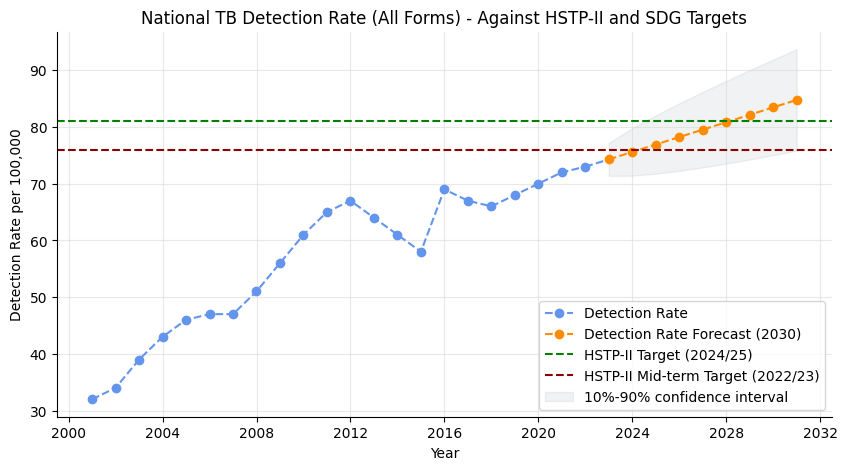

In [49]:
# test_oromia = test_data.loc['Oromia',['year','rate']]
# test_oromia.set_index('year', inplace=True)
# test_oromia = test_oromia.squeeze()

plt.figure(figsize=(10,5))

item_id='Ethiopia'
detection_past = train_data.loc[item_id]['Rate']
detection_pred = predictions.loc[item_id]
# detection_test = test_oromia

plt.annotate('Mid-term target', xy=(4, 76), xytext=(4,70), fontsize=10, fontweight='bold',
            arrowprops=dict(arrowstyle='->', lw=3))
plt.grid(color='lightgray', alpha=0.5, zorder=1)
plt.plot(detection_past, marker='o', color='cornflowerblue', linestyle='dashed', label='Detection Rate')
plt.plot(data, color='cornflowerblue',linestyle="dashed")
plt.plot(detection_pred['mean'], marker='o', color='darkorange',linestyle='dashed',label='Detection Rate Forecast (2030)')
# plt.text(2, 76, 'HSTP-II Mid-term target: 76%', fontdict={'size':10, 'color':'r'})
# plt.plot(detection_test, label='Existing Test Detection')
# plt.axhline(y=90, linestyle='dashed', color='blueviolet',label='SDG Target (2030)')
plt.axhline(y=81, linestyle='dashed', color='green',label='HSTP-II Target (2024/25)')
# text(2, 81, 'HSTP-II Target: 81%')
plt.axhline(y=76, linestyle='dashed', color='darkred', label='HSTP-II Mid-term Target (2022/23)')
# plt.text(2, 76, 'HSTP-II Mid-term target: 76%', fontdict={'size':10, 'color':'r'})
plt.xlabel('Year')
plt.ylabel('Detection Rate per 100,000')
plt.title('National TB Detection Rate (All Forms) - Against HSTP-II and SDG Targets')

plt.fill_between(
    detection_pred.index, detection_pred['0.2'], detection_pred['0.8'], alpha=0.1, label=f'10%-90% confidence interval',
    color='slategray'
)

plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('national_tb_detection_WHO.png')

In [ ]:
# Test for Amhara
test_amhara = test_data.loc['Amhara',['year','rate']]
test_amhara.set_index('year', inplace=True)
test_amhara = test_amhara.squeeze()

plt.figure(figsize=(10,3))

item_id='Amhara'
detection_past = train_data.loc[item_id]['rate']
detection_pred = predictions.loc[item_id]
detection_test = test_amhara

plt.plot(detection_past, label='Past Detection Rate')
plt.plot(detection_pred['mean'], label='Mean Forecast')
plt.plot(detection_test, label='Existing Test Detection')

plt.fill_between(
    detection_pred.index, detection_pred['0.1'], detection_pred['0.9'], alpha=0.1, label=f'10%-90% confidence interval'
)

plt.legend()

In [ ]:
# Test for Addis Ababa
test_aa = test_data.loc['Addis Ababa',['year','rate']]
test_aa.set_index('year', inplace=True)
test_aa = test_aa.squeeze()

plt.figure(figsize=(10,3))

item_id='Addis Ababa'
detection_past = train_data.loc[item_id]['rate']
detection_pred = predictions.loc[item_id]
detection_test = test_aa

plt.plot(detection_past, label='Past Detection Rate')
plt.plot(detection_pred['mean'], label='Mean Forecast')
plt.plot(detection_test, label='Existing Test Detection')

plt.fill_between(
    detection_pred.index, detection_pred['0.1'], detection_pred['0.9'], alpha=0.1, label=f'10%-90% confidence interval'
)

plt.legend()

In [ ]:
# Test for National
test_national = test_data.loc['National',['year','rate']]
test_national.set_index('year', inplace=True)
test_national = test_national.squeeze()

plt.figure(figsize=(10,3))

item_id='National'
detection_past = train_data.loc[item_id]['rate']
detection_pred = predictions.loc[item_id]
detection_test = test_national

plt.plot(detection_past, label='Past Detection Rate')
plt.plot(detection_pred['mean'], label='Mean Forecast')
plt.plot(detection_test, label='Existing Test Detection')
plt.axhline(y=81, linestyle='dashed', color='red',label='HSTP-II Target')
plt.axhline(y=76, linestyle='dashed', color='yellow', label='HSTP-II Mid-term Target')

plt.fill_between(
    detection_pred.index, detection_pred['0.1'], detection_pred['0.9'], alpha=0.1, label=f'10%-90% confidence interval'
)

plt.legend()

In [ ]:
# Let us check the national tb data
tb_national = pd.read_csv('data/tb_detection_rate_by_region.csv', usecols=['Year','National'])

In [ ]:
tb_national.head

In [ ]:
years

In [ ]:
years = tb_national['Year']
rate = tb_national['National']
plt.plot(years, rate, marker='o', label='Detection Rate')
plt.axhline(y=76, linestyle='dashed', color='yellow', label='HSTP-II Mid-term Target')
plt.axhline(y=81, linestyle='dashed', color='red',label='HSTP-II Target')
plt.xlabel('Year')
plt.ylabel('Detection Rate')
plt.title('National TB Detection Rate')
plt.legend()

In [ ]:
plt.plot(data, marker='o', linestyle="dashed", label='Hello World')

In [50]:
train_data.loc[item_id]['Rate']

timestamp
2000-12-31    32
2001-12-31    34
2002-12-31    39
2003-12-31    43
2004-12-31    46
2005-12-31    47
2006-12-31    47
2007-12-31    51
2008-12-31    56
2009-12-31    61
2010-12-31    65
2011-12-31    67
2012-12-31    64
2013-12-31    61
2014-12-31    58
2015-12-31    69
2016-12-31    67
2017-12-31    66
2018-12-31    68
2019-12-31    70
2020-12-31    72
2021-12-31    73
Name: Rate, dtype: int64